<a href="https://colab.research.google.com/github/meozbrls/Flight_Prices_Analysis/blob/ozgun/notebooks/flight_prices_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install gdown pyarrow

import gdown, os
import pandas as pd

FILE_ID = "15MB8kYT9Ny2_CJ_SvFvPKTSBkmfUL0wv"   # linkten
OUT_PATH = "data/flightprices_2022_06.parquet"  # local çalışma yolu

os.makedirs("data", exist_ok=True)

if not os.path.exists(OUT_PATH):
    url = f"https://drive.google.com/uc?id={FILE_ID}"
    gdown.download(url, OUT_PATH, quiet=False)

df = pd.read_parquet(OUT_PATH)
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=15MB8kYT9Ny2_CJ_SvFvPKTSBkmfUL0wv
From (redirected): https://drive.google.com/uc?id=15MB8kYT9Ny2_CJ_SvFvPKTSBkmfUL0wv&confirm=t&uuid=f1e73e4c-7487-4ce5-bc42-b6ca5ec66ba2
To: /content/data/flightprices_2022_06.parquet
100%|██████████| 772M/772M [00:07<00:00, 103MB/s]


,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsCabinCode
0,684e879e0f2cefcdbfba1f7e35f897a3,2022-04-17,2022-06-01,ATL,BOS,RA7NR,PT2H28M,0,False,False,...,31.00,87.59,0,NaN,2022-06-01T06:25:00.000-04:00,2022-06-01T08:53:00.000-04:00,Spirit Airlines,NK,Airbus A319,coach
1,222cfd6d1b0d5732602a3e82ad7730c3,2022-04-17,2022-06-01,ATL,BOS,W21ZXP5,PT4H50M,0,False,False,...,65.48,93.99,4,947.0,2022-06-01T06:00:00.000-04:00||2022-06-01T09:3...,2022-06-01T08:05:00.000-04:00||2022-06-01T10:5...,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A320||,coach||coach
2,5b13b222dff8d227c34ba5f0b10a8b5a,2022-04-17,2022-06-01,ATL,BOS,GA7NR,PT8H38M,1,False,False,...,25.58,95.16,0,NaN,2022-06-01T15:29:00.000-04:00||2022-06-01T20:5...,2022-06-01T17:28:00.000-04:00||2022-06-02T00:0...,Spirit Airlines||Spirit Airlines,NK||NK,||,coach||coach
3,71cf5163f5efbd007c87aeef85e0c2cc,2022-04-17,2022-06-01,ATL,BOS,UA3NX0MC,PT2H37M,0,False,False,...,161.86,188.60,9,947.0,2022-06-01T12:58:00.000-04:00,2022-06-01T15:35:00.000-04:00,Delta,DL,None,coach
4,141ef83862caac6be402158433b55c1f,2022-04-17,2022-06-01,ATL,BOS,UAUOA0MC,PT2H41M,0,False,False,...,161.86,188.60,2,947.0,2022-06-01T16:10:00.000-04:00,2022-06-01T18:51:00.000-04:00,Delta,DL,Airbus A321,coach


In [ ]:
df.shape

(11774933, 21)

In [2]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

check_df(df)

##################### Shape #####################
(11774933, 21)
##################### Types #####################
legId                                   object
searchDate                              object
flightDate                      datetime64[ns]
startingAirport                         object
destinationAirport                      object
fareBasisCode                           object
travelDuration                          object
elapsedDays                              int64
isBasicEconomy                            bool
isRefundable                              bool
isNonStop                                 bool
baseFare                               float64
totalFare                              float64
seatsRemaining                           int64
totalTravelDistance                    float64
segmentsDepartureTimeRaw                object
segmentsArrivalTimeRaw                  object
segmentsAirlineName                     object
segmentsAirlineCode                    

In [3]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car



In [4]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 11774933
Variables: 21
cat_cols: 6
num_cols: 5
cat_but_car: 10
num_but_cat: 4


In [5]:
df[cat_but_car].head(10)

,legId,searchDate,fareBasisCode,travelDuration,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsCabinCode
0,684e879e0f2cefcdbfba1f7e35f897a3,2022-04-17,RA7NR,PT2H28M,2022-06-01T06:25:00.000-04:00,2022-06-01T08:53:00.000-04:00,Spirit Airlines,NK,Airbus A319,coach
1,222cfd6d1b0d5732602a3e82ad7730c3,2022-04-17,W21ZXP5,PT4H50M,2022-06-01T06:00:00.000-04:00||2022-06-01T09:3...,2022-06-01T08:05:00.000-04:00||2022-06-01T10:5...,Frontier Airlines||Frontier Airlines,F9||F9,Airbus A320||,coach||coach
2,5b13b222dff8d227c34ba5f0b10a8b5a,2022-04-17,GA7NR,PT8H38M,2022-06-01T15:29:00.000-04:00||2022-06-01T20:5...,2022-06-01T17:28:00.000-04:00||2022-06-02T00:0...,Spirit Airlines||Spirit Airlines,NK||NK,||,coach||coach
3,71cf5163f5efbd007c87aeef85e0c2cc,2022-04-17,UA3NX0MC,PT2H37M,2022-06-01T12:58:00.000-04:00,2022-06-01T15:35:00.000-04:00,Delta,DL,None,coach
4,141ef83862caac6be402158433b55c1f,2022-04-17,UAUOA0MC,PT2H41M,2022-06-01T16:10:00.000-04:00,2022-06-01T18:51:00.000-04:00,Delta,DL,Airbus A321,coach
5,5921ef14d28a822fc25eb9d7879134a9,2022-04-17,GUAJZNN3,PT6H3M,2022-06-01T06:17:00.000-04:00||2022-06-01T10:1...,2022-06-01T07:35:00.000-04:00||2022-06-01T12:2...,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A320,coach||coach
6,3ce43c14cd65f1d4303a4b90093f328c,2022-04-17,UAUQA0BQ,PT8H13M,2022-06-01T08:10:00.000-04:00||2022-06-01T15:0...,2022-06-01T10:29:00.000-04:00||2022-06-01T16:2...,Delta||Delta,DL||DL,Airbus A321||Embraer 175,coach||coach
7,e440aaeeac48e7f2e7d6f190c18b0cb7,2022-04-17,UA7QA0BQ,PT11H29M,2022-06-01T22:35:00.000-04:00||2022-06-02T08:4...,2022-06-02T00:48:00.000-04:00||2022-06-02T10:0...,Delta||Delta,DL||DL,Boeing 737-800||Canadair Regional Jet 900,coach||coach
8,c76997b9f6f1da646116f8127c579f03,2022-04-17,GUAJZNN3,PT4H37M,2022-06-01T11:03:00.000-04:00||2022-06-01T14:0...,2022-06-01T12:59:00.000-04:00||2022-06-01T15:4...,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,coach||coach
9,e4ec3cbafe64d38aff595ffa99bb8be1,2022-04-17,GUAJZNN3,PT4H44M,2022-06-01T08:49:00.000-04:00||2022-06-01T12:0...,2022-06-01T10:45:00.000-04:00||2022-06-01T13:3...,American Airlines||American Airlines,AA||AA,Embraer 175||Airbus A319,coach||coach


In [31]:
num_cols

['flightDate',
 'baseFare',
 'totalFare',
 'seatsRemaining',
 'totalTravelDistance']

In [23]:
import missingno as msno
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


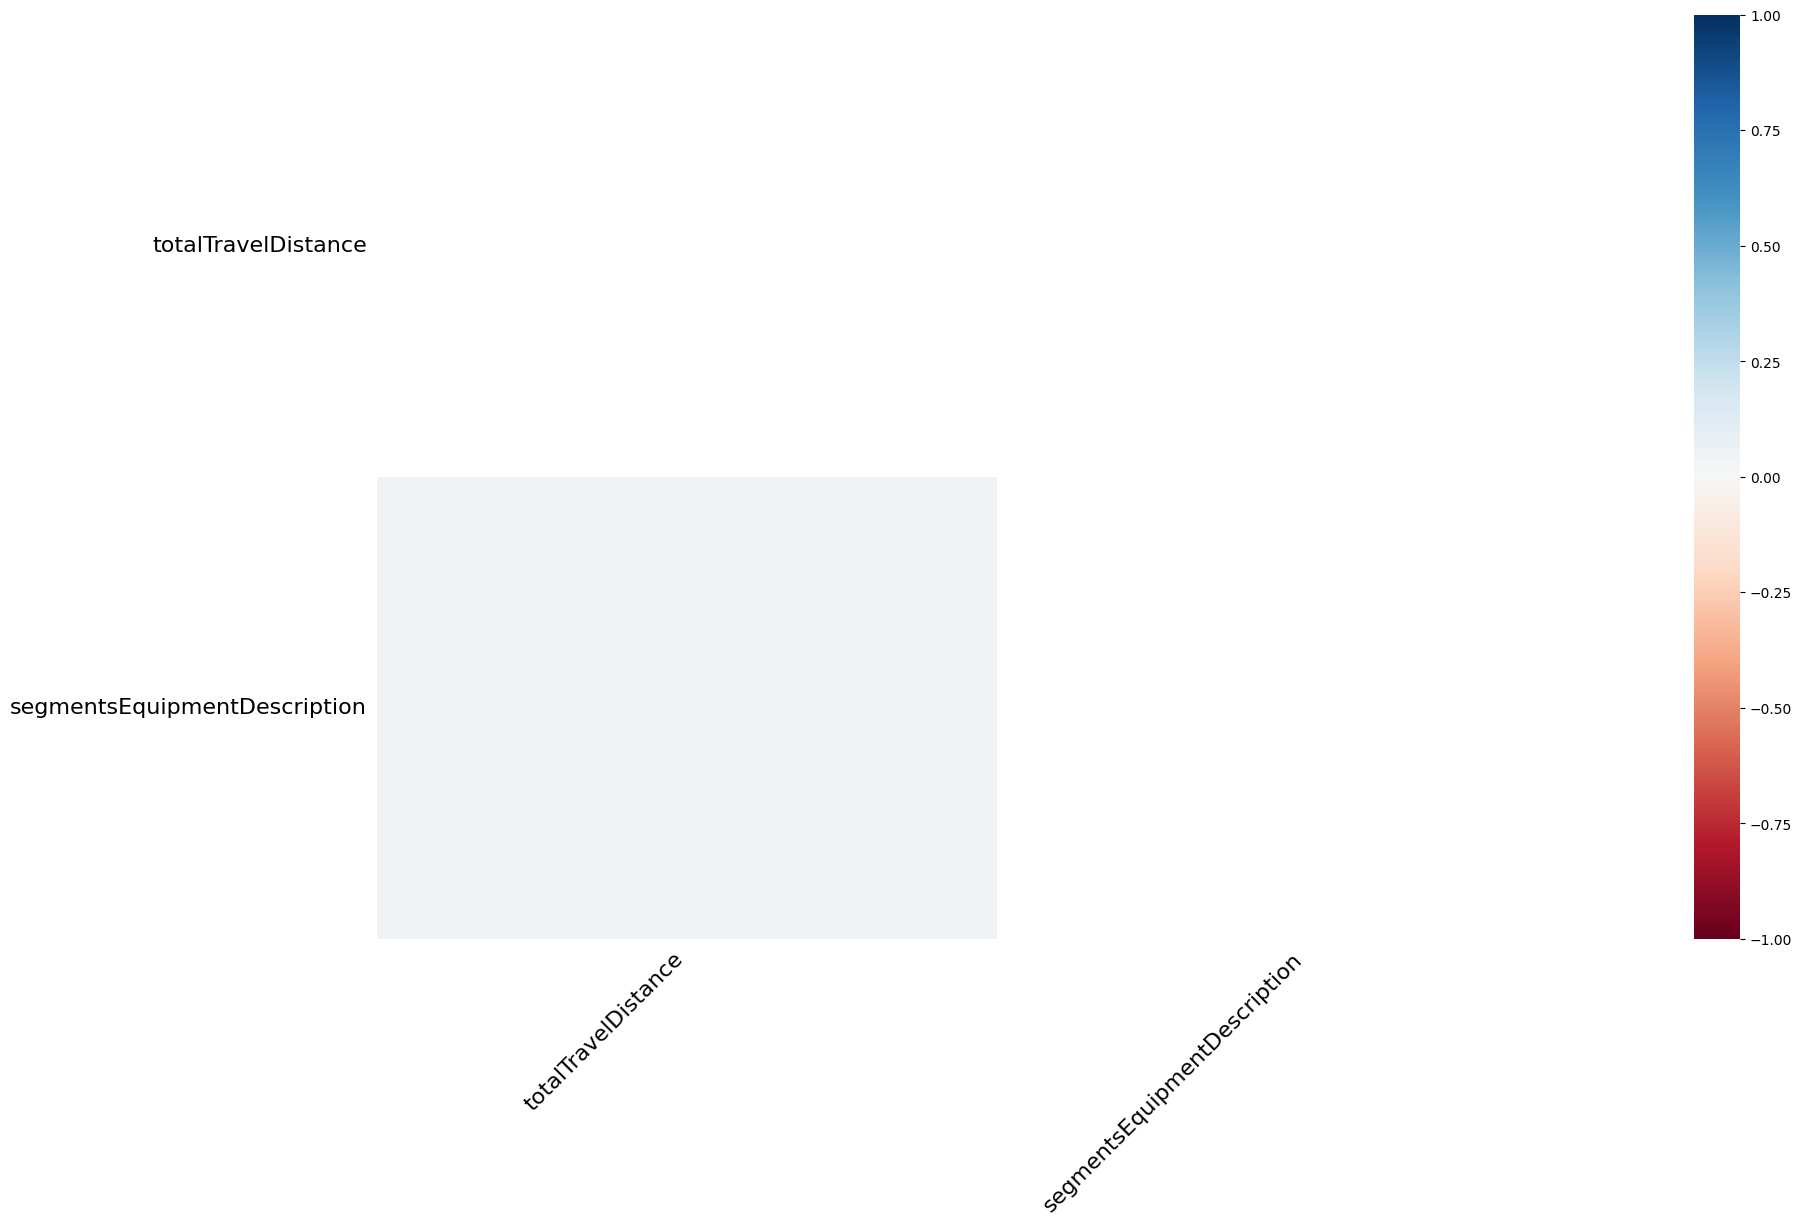

In [9]:
msno.heatmap(df)
plt.show()

<Axes: >

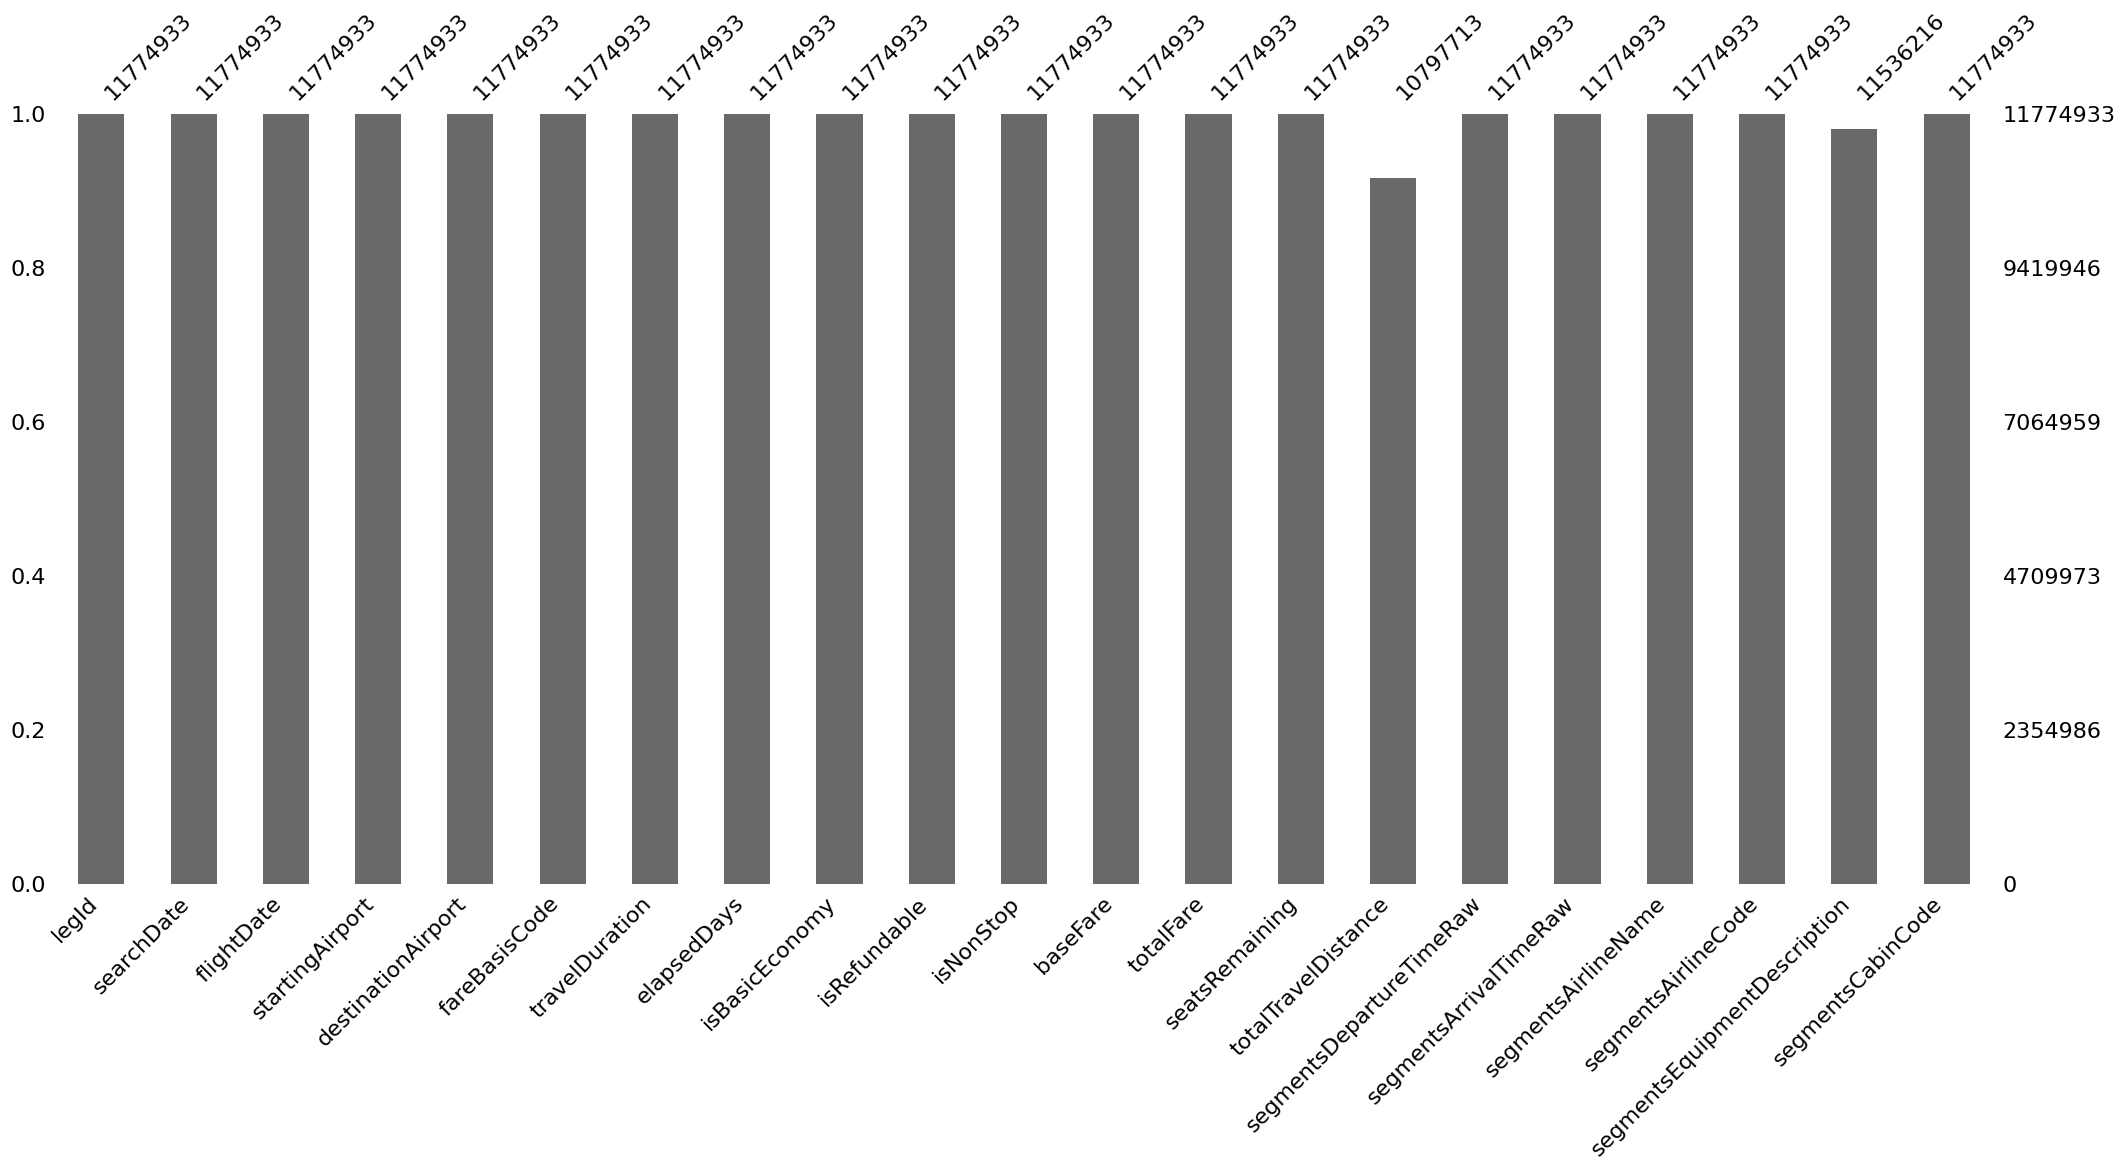

In [11]:
msno.bar(df)

In [15]:
df_nan = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]

In [16]:
df_nan

,totalTravelDistance,segmentsEquipmentDescription
0,NaN,Airbus A319
1,947.0,Airbus A320||
2,NaN,||
3,947.0,None
4,947.0,Airbus A321
...,...,...
11774928,2663.0,BOEING 777-300ER||Embraer 175 (Enhanced Winglets)
11774929,2663.0,Boeing 737-900||Embraer 175 (Enhanced Winglets)
11774930,NaN,||
11774931,2736.0,Embraer 175||Airbus A321


<Axes: >

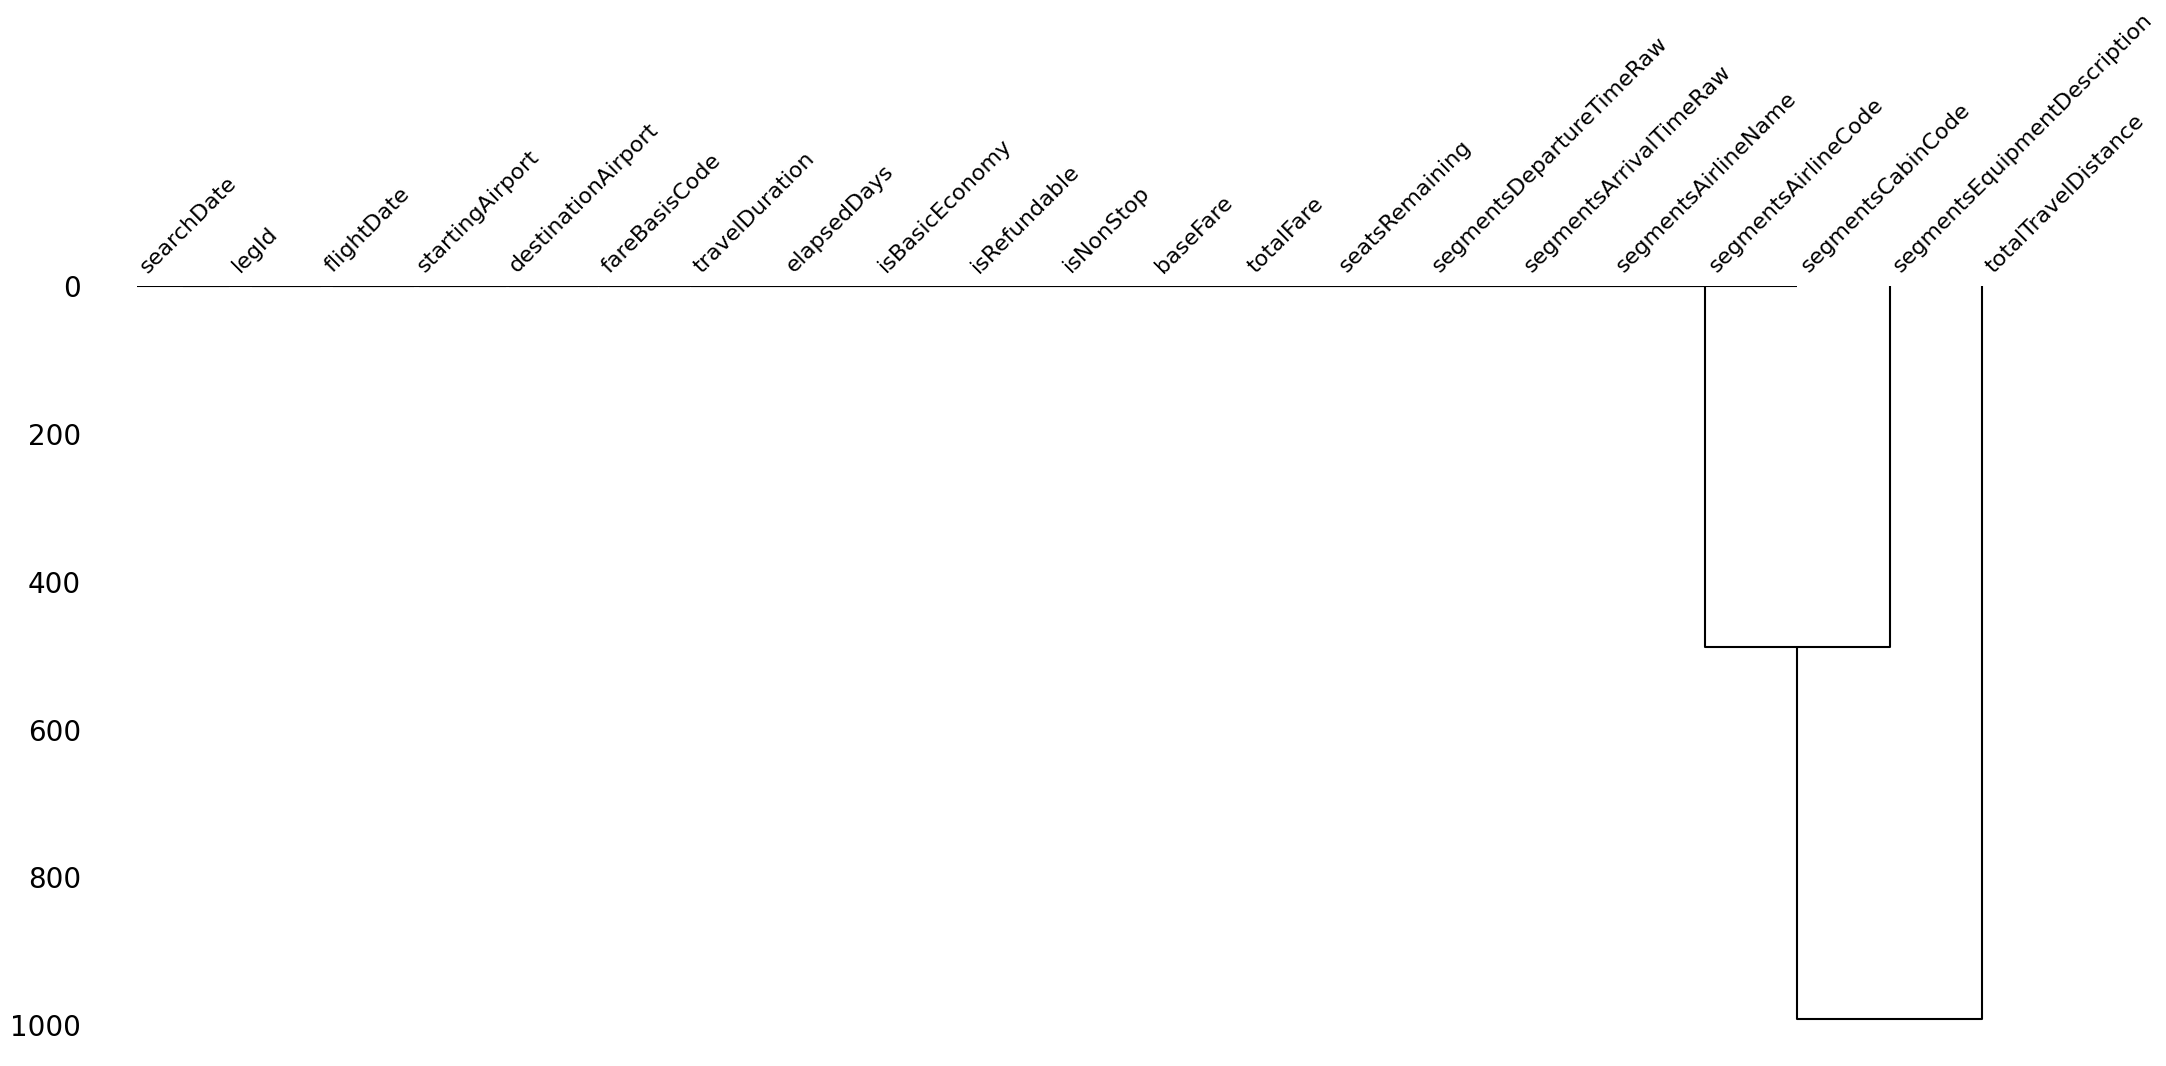

In [17]:
msno.dendrogram(df)


In [30]:
g = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False) / df.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
g["nans"]=g["nans"].round(3)


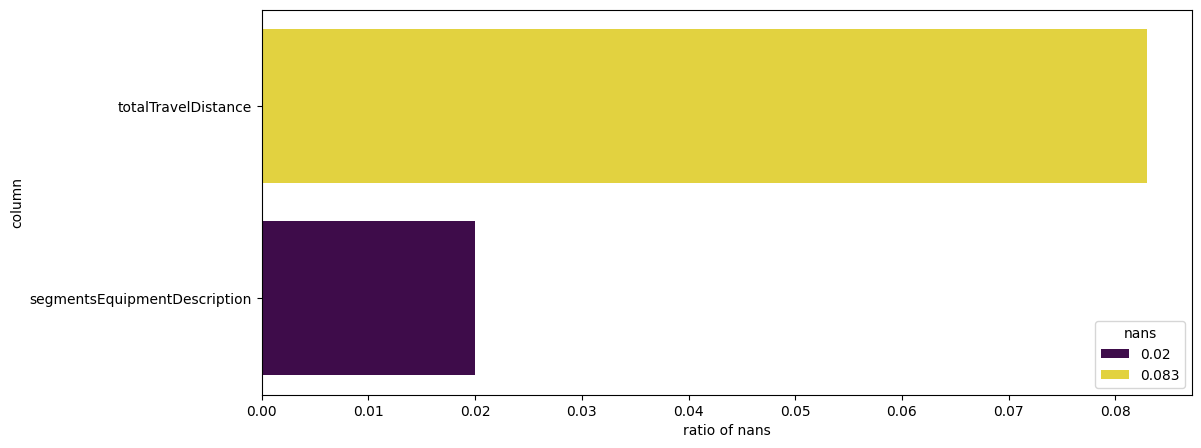

In [29]:
sns.barplot(x='nans', y='column', data=g, ax=plt.subplots(1,1,figsize=(12,5))[1], palette='viridis',hue="nans" )
plt.xlabel('ratio of nans');

,nans
0,0.083
1,0.020
